<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/AbaloneAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [7]:
import pandas as pd

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [10]:
abalone

{'data': {'ids': None,
  'features':      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
  0      M   0.455     0.365   0.095        0.5140          0.2245   
  1      M   0.350     0.265   0.090        0.2255          0.0995   
  2      F   0.530     0.420   0.135        0.6770          0.2565   
  3      M   0.440     0.365   0.125        0.5160          0.2155   
  4      I   0.330     0.255   0.080        0.2050          0.0895   
  ...   ..     ...       ...     ...           ...             ...   
  4172   F   0.565     0.450   0.165        0.8870          0.3700   
  4173   M   0.590     0.440   0.135        0.9660          0.4390   
  4174   M   0.600     0.475   0.205        1.1760          0.5255   
  4175   F   0.625     0.485   0.150        1.0945          0.5310   
  4176   M   0.710     0.555   0.195        1.9485          0.9455   
  
        Viscera_weight  Shell_weight  
  0             0.1010        0.1500  
  1             0.0485        0.0700  
  2  

In [12]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
y.head(20)

,Rings
0,15
1,7
2,9
3,10
4,7
5,8
6,20
7,16
8,9
9,19


In [17]:
priors = y["Rings"].value_counts( normalize=True )
priors

,proportion
Rings,
9,0.164951
10,0.151784
8,0.135983
11,0.116591
7,0.093608
12,0.063921
6,0.062006
13,0.048599
14,0.030165


In [18]:
X["Height"].mean()

0.13951639932966242

In [25]:
X["Rings"] = (y["Rings"] )

In [26]:
X["height_cat"] = (X["Height"] > 0.13951639932966242)*1

In [27]:
X["height_cat"].value_counts(normalize=True)

,proportion
height_cat,
1,0.548719
0,0.451281


In [28]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,height_cat,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,7


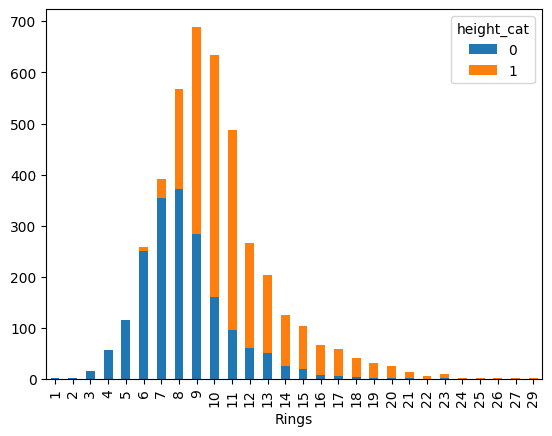

In [29]:
X.groupby(["Rings","height_cat"]).size().unstack().plot(kind='bar',stacked=True);